**Importing The Dependinces**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics

**Importing The Data**

In [ ]:
strokes_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
strokes_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
strokes_data = strokes_data.drop ('id', axis = 1)

In [ ]:
strokes_data.shape

(5110, 11)

In [ ]:
strokes_data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


**Pre-Processing The Data**

In [ ]:
#droping all rows that miss bmi
strokes_data = strokes_data.dropna()

In [ ]:
#droping all data with unknown values in the smoking status
strokes_data = strokes_data[strokes_data['smoking_status'] != 'Unknown']

In [ ]:
#droping work type column
strokes_data = strokes_data.drop ('work_type', axis = 1)

In [ ]:
strokes_data.shape

(3426, 10)

In [ ]:

strokes_data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0
stroke,0


In [ ]:
#convert yes & no to 1 & 0
strokes_data['ever_married'] = strokes_data['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)

strokes_data['Residence_type'] = strokes_data['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

strokes_data['smoking_status'] = strokes_data['smoking_status'].apply(lambda x: 1 if x == 'smokes' else (2 if x == 'formerly smoked' else (3 if x == 'never smoked' else 0)))

#converting male to 1 and female to 0
strokes_data['gender'] = strokes_data['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [ ]:
strokes_data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,2,1
2,1,80.0,0,1,1,0,105.92,32.5,3,1
3,0,49.0,0,0,1,1,171.23,34.4,1,1
4,0,79.0,1,0,1,0,174.12,24.0,3,1
5,1,81.0,0,0,1,1,186.21,29.0,2,1


In [ ]:
strokes_data.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000
mean,0.390835,48.645943,0.119089,0.060128,0.758611,0.509340,108.321891,30.290047,2.325452,0.052539
std,0.488009,18.851239,0.323941,0.237759,0.427988,0.499986,47.703541,7.295958,0.806202,0.223145
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,1.000000,0.000000
25%,0.000000,34.000000,0.000000,0.000000,1.000000,0.000000,77.237500,25.300000,2.000000,0.000000
50%,0.000000,50.000000,0.000000,0.000000,1.000000,1.000000,92.360000,29.100000,3.000000,0.000000
75%,1.000000,63.000000,0.000000,0.000000,1.000000,1.000000,116.207500,34.100000,3.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,92.000000,3.000000,1.000000


**Making a Correlation**

In [ ]:
correlation = strokes_data.corr()

<Axes: >

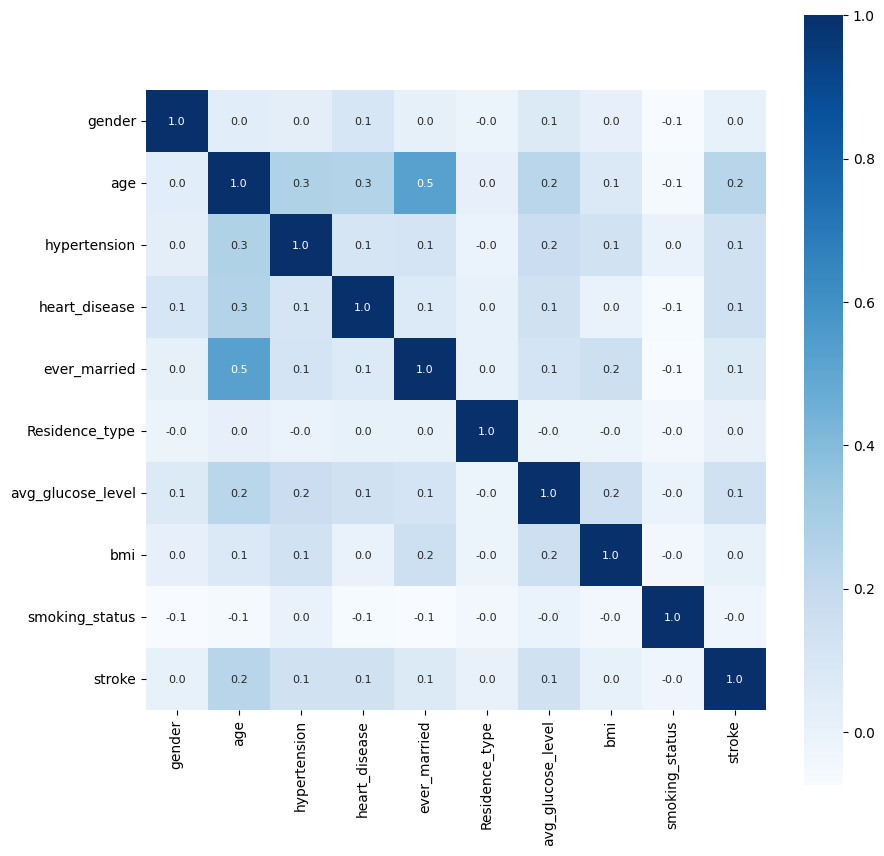

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**Data Labeling**

In [ ]:
x = strokes_data.drop(columns = 'stroke', axis=1)
y = strokes_data['stroke']

In [ ]:
print(x)
print(y)

      gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0          1  67.0             0              1             1               1   
2          1  80.0             0              1             1               0   
3          0  49.0             0              0             1               1   
4          0  79.0             1              0             1               0   
5          1  81.0             0              0             1               1   
...      ...   ...           ...            ...           ...             ...   
5100       1  82.0             1              0             1               0   
5102       0  57.0             0              0             1               0   
5106       0  81.0             0              0             1               1   
5107       0  35.0             0              0             1               0   
5108       1  51.0             0              0             1               0   

      avg_glucose_level   b

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

In [ ]:
print (x.shape, x_train.shape, x_test.shape)

(3426, 9) (2740, 9) (686, 9)


**Model Training**

XGBoost Regressor

In [ ]:
model = XGBClassifier()

In [ ]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Evaluation**

In [ ]:
#Accuracy for prediction on training data
training_data_prediction = model.predict(x_train)

In [ ]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  1.0
Mean Absolute Error :  0.0


In [ ]:
input_data = (1,	67.0,	0,	1,	1,	1,	228.69,	36.6,	2	)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not likely to get a stroke.')
else:
  print('The person is likely to get a stroke.')

[1]
The person is likely to get a stroke.


****Saving the trained Model**


In [ ]:
import pickle

In [ ]:
filename = 'strokes_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('strokes_model.sav', 'rb'))

In [ ]:
for column in x.columns:
  print(column)

gender
age
hypertension
heart_disease
ever_married
Residence_type
avg_glucose_level
bmi
smoking_status
